## K-Means Algorithm
**K-means** is an unsupervised machine learning algorithm used for clustering. It works by randomly assigning each data point to a cluster and then finding the mean of all the points within each cluster. The algorithm then iteratively moves the mean point of each cluster towards the center of the data points in that cluster. This process is repeated until the clusters converge, at which point the algorithm stops and returns the final clusters. K-means can be used to identify patterns and trends in large datasets.

In [73]:
# Required Libraries...
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
# Reading the CSV file:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


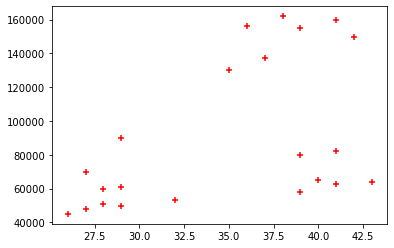

In [75]:
# As our dataset is very simple, let's plot it using scatter plot to see the data distribution:
plt.scatter(df['Age'], df['Income($)'], color = "red", marker = "+")

In [76]:
# So as we see the data is look to be three clusters. In this case choosing K is not hard.
# Let's call to KMeans and assign K:
km = KMeans(n_clusters = 3)

In [82]:
# Next step is, in Supervised learning we first fit() the model and then we predict, but here we do it at the same time:
# So we're fitting and predicting the DataFrame excluding the name column, because name column is string and is not working 
# for us:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

* So the [22] statement run the K-Means algorithm on Age and Income columns, and it computed the cluster regarding the defined criteria (n_clusters = 3). Finally it assign three labels to the data points [0 - 1 - 2].

In [85]:
# So now let's visualize the y_predicted array using scatter plot. Let's first append the y_predicted array to a DataFrame:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


* So we see which 'Age' and 'Income($)' is related to cluster 0, cluster 1 and cluster 2.

In [62]:
# Let's see the scatter plot:
# So we need to separate these three clusters into three different DataFrames. Each DataFrame return the related clusters rows:
# As result we'll have three different DataFrames, each belongs to a separate cluster.
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

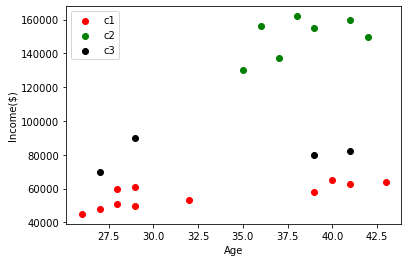

In [63]:
# Let's plot the three DataFrames in a single scatter plot:
c1 = plt.scatter(df0.Age, df0["Income($)"], color = "red")
c2 = plt.scatter(df1.Age, df1["Income($)"], color = "green")
c3 = plt.scatter(df2.Age, df2["Income($)"], color = "black")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend([c1, c2, c3], ['c1','c2','c3'])

* So we see the scatter right here, but there is a problem with the black and red clusters. The reason is: our scalling is not right. See our y-axis is scalled from 40000 to 160000 and its range is almost 120000, and the range of x-axis is pretty narrow almost 15. So both the ((x & y) - axis are not scalled. When you don't scall your features properly, you might get to this problem. Thats why we need some preprocessing. So we use MinMaxScaller to scall these two features.

In [80]:
# So here we going to use MinMaxScaller:
# Let's create the object from the MinMaxScaller:
scaller = MinMaxScaler()

In [86]:
# Now let's fit (scall) the 'Income($)' feature: it will scall the feature into [0-1]
scaller.fit(df[["Income($)"]])
df["Income($)"] = scaller.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


* So now the 'Income($)' column is scalled between 0 and 1.

In [87]:
# Now let's do the same scalling for column 'age':
scaller.fit(df[["Age"]])
df["Age"] = scaller.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


* **Yesssssssssssssssssssssssssssssssssss!** Now both the columns are scalled between 0 and 1.

In [88]:
# Now we need to train the KMeans algorithm using the scalled dataset:
km1 = KMeans(n_clusters = 3)
y_predicted_new = km.fit_predict(df[["Age", "Income($)"]])
y_predicted_new

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [89]:
# Now let's drop the prebious assigned 'cluster' columns:
df.drop(["cluster"], axis = "columns", inplace = True)
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [92]:
# Now let's add the new generated clusters:
df["cluster"] = y_predicted_new
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [105]:
# To checke the cenctroids of the three different clusters, we can call a variable 'cluster_centers_':
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

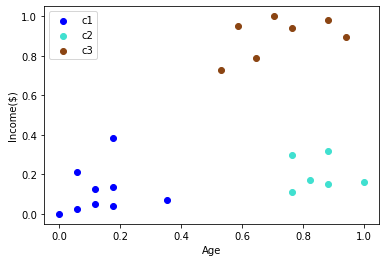

In [102]:
# Now the model is trained using scalled dataset. So let's again plot the clusters:

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

c1 = plt.scatter(df0.Age, df0["Income($)"], color = "blue")
c2 = plt.scatter(df1.Age, df1["Income($)"], color = "Turquoise")
c3 = plt.scatter(df2.Age, df2["Income($)"], color = "SaddleBrown")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend([c1, c2, c3], ['c1','c2','c3'])

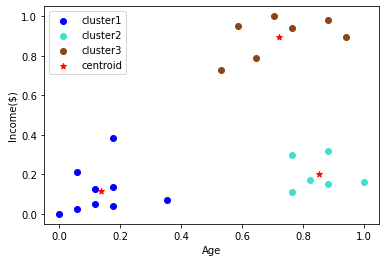

In [106]:
# Let's add the centroids of the clusters to the plots:

c1 = plt.scatter(df0.Age, df0["Income($)"], color = "blue")
c2 = plt.scatter(df1.Age, df1["Income($)"], color = "Turquoise")
c3 = plt.scatter(df2.Age, df2["Income($)"], color = "SaddleBrown")

centroid = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "red", marker = "*", label = "Centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend([c1, c2, c3, centroid], ['cluster1','cluster2','cluster3', 'centroid'])

* So this was a simple dataset, when you're trying to solve a real world problems, you will come across dataset which will have like 50 features, so it will be hard to plot it on the scatter plot. So in this case you need you use 'Elbow plot' method.
* So in Elbow plot we goes through a number of Ks, for example from 1 to 15, then we calculate the SSE (Sum of Square Errors) and then we plot them, and we try to find the elbow. When we found the Elbow, it means we find the correct K.

In [109]:
# So let's define the K range first, then we define SSE in an array to store all the errors and then we'll plot it. 
# Then we fit the model inside the loop for each K. We have a parameter called 'inertia' in KMeans which give us the SSE and
# we append that error to SSE array.
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [110]:
# So now let's see SEE:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22395807059250117,
 0.16858512236029757,
 0.14682060617795395,
 0.10907864282306065]

* So here we see in first two iterations the error was higher, but then it's getting smaller.

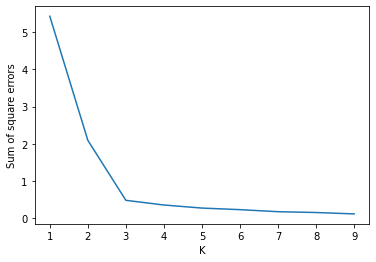

In [112]:
# Now let's plot the SSE in a nice chart:
plt.xlabel("K")
plt.ylabel("Sum of square errors")
plt.plot(k_range, sse)

* So as we see very clear in the plot the elbow is K = 3.

### Exercise
    1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
    2. Figure out if any preprocessing such as scaling would help here
    3. Draw elbow plot and from that figure out optimal value of k